<a href="https://colab.research.google.com/github/thuong113/ImageClassification/blob/main/handsomeboy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 100 Image Classification 

 This dataset contains 100 different classes of image. Each classes contain 500 other images therefore we can say the data is properly organised.  All images are of `3 channels` of dimensions `32 x 32` . We will be applying different Deep Learning approaches to get the best outputs from this dataset. 
 
 I would like to mention [This site](https://www.kaggle.com/minbavel/cifar-100-images) from where I took the dataset on which I will be working on . I would also like to thank Jovian.ml team and [Aakash N S](https://github.com/aakashns)(Founder of Jovian.ml) for whom this project and this course on Deep Learnig with pytorch was possible . I am doing this Project with the help of the notebooks and course material provided in the [Deep Learning with pytorch : Zero To Gans](https://jovian.ml/forum/c/pytorch-zero-to-gans/18) course. This course is uploaded in You Tube for Free in freecodecamp.org YouTube Channel.  

In [4]:
!pip install opendatasets --upgrade -q
!pip install jovian --upgrade -q

In [5]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import os
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.models as models
import matplotlib.pyplot as plt
import opendatasets as od
%matplotlib inline

In [6]:
# #{"username":"nguynduythng","key":"7fffb0236a2c6b5016d99ca6180421a9"}
dataset_url = 'https://www.kaggle.com/minbavel/cifar-100-images'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nguynduythng
Your Kaggle Key: ··········


  8%|▊         | 11.0M/140M [00:00<00:01, 115MB/s]

100%|██████████| 140M/140M [00:00<00:00, 261MB/s]


## How to get Kaggle Key and Username?

1. Sign in to https://kaggle.com/, then click on your profile picture on the top right and select "My Account" from the menu
2. Scroll down to the "API" section and click "Create New API Token". This will download a file kaggle.json with the following contents: {"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_KEY"}
3. When you run opendatsets.download, you will be asked to enter your username & Kaggle API, which you can get from the file downloaded in step 2.

In [7]:
project_name="Cifar-100"

## Preparing the Data

Let's begin by downloading the dataset and creating PyTorch datasets to load the data.

Here in my Project I will be using dataset that is already present in Kaggle data section. 
I am using CIFAR 100 dataset from https://www.kaggle.com/minbavel/cifar-100-images

In [8]:
# I dowloaded the dataset using OpenDataset Library and by entering my Kaggle Key and Kaggle Username
# Let's look into the data directory
data_dir = './cifar-100-images/CIFAR100'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/TRAIN")
print(classes[:10])
print(len(classes))

['TEST', 'TRAIN']
['crab', 'plain', 'seal', 'crocodile', 'willow_tree', 'man', 'rocket', 'possum', 'sweet_pepper', 'bed']
100


In [9]:
# Let's evaluate a single class say "man"
man_file=os.listdir(data_dir+"/TRAIN/man")
print("NO. of Training examples for Man:",len(man_file))
print(man_file[:5])

NO. of Training examples for Man: 500
['adam_s_002602.png', 'man_s_001958.png', 'adam_s_002095.png', 'adam_s_000304.png', 'adam_s_002207.png']


In [10]:
# Let's see how many number of files/images are present in each classes#set
di={}
for i in classes:
    di[i]=len(os.listdir(data_dir+"/TRAIN/"+i))
print(di)

{'crab': 500, 'plain': 500, 'seal': 500, 'crocodile': 500, 'willow_tree': 500, 'man': 500, 'rocket': 500, 'possum': 500, 'sweet_pepper': 500, 'bed': 500, 'tulip': 500, 'lion': 500, 'camel': 500, 'bus': 500, 'boy': 500, 'butterfly': 500, 'baby': 500, 'dinosaur': 500, 'otter': 500, 'mushroom': 500, 'skyscraper': 500, 'tiger': 500, 'aquarium_fish': 500, 'rose': 500, 'woman': 500, 'bottle': 500, 'keyboard': 500, 'sunflower': 500, 'dolphin': 500, 'bear': 500, 'pear': 500, 'chair': 500, 'chimpanzee': 500, 'clock': 500, 'lizard': 500, 'cockroach': 500, 'porcupine': 500, 'pine_tree': 500, 'apple': 500, 'television': 500, 'rabbit': 500, 'shrew': 500, 'shark': 500, 'wolf': 500, 'leopard': 500, 'table': 500, 'spider': 500, 'tank': 500, 'tractor': 500, 'house': 500, 'squirrel': 500, 'lobster': 500, 'bicycle': 500, 'mouse': 500, 'flatfish': 500, 'maple_tree': 500, 'motorcycle': 500, 'cattle': 500, 'can': 500, 'lawn_mower': 500, 'snake': 500, 'beetle': 500, 'plate': 500, 'palm_tree': 500, 'elephant'

# Training the Dataset 

In [11]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4,padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)
                        ])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])

In [12]:
# PyTorch datasets
train_ds = ImageFolder(data_dir+'/TRAIN', train_tfms)
valid_ds = ImageFolder(data_dir+'/TEST', valid_tfms)

In [13]:
# Let's use batch size
batch_size = 400

In [14]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Here are some examples after applying data augmentation and Normalization

In [15]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


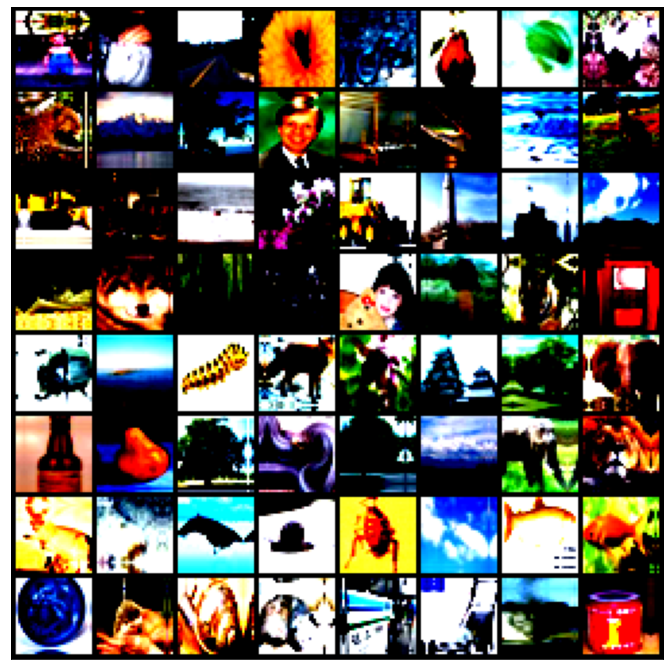

In [16]:
show_batch(train_dl)

## Using a GPU

To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required.

In [17]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [18]:
device = get_default_device()
device

device(type='cuda')

In [19]:
# # Transfering data to the device in use (In our case GPU)
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [20]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
      #tính lỗi cho mỗi epoch
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [21]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet152(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        self.conv5 = conv_block(512, 1028, pool=True)
        self.res3 = nn.Sequential(conv_block(1028, 1028), conv_block(1028, 1028))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(2), 
                                        nn.Flatten(), 
                                        nn.Linear(1028, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.conv5(out)
        out = self.res3(out) + out
        out = self.classifier(out)
        return out

In [22]:
model = to_device(ResNet152(3, 100), device)
model

ResNet152(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=

# Training the model



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


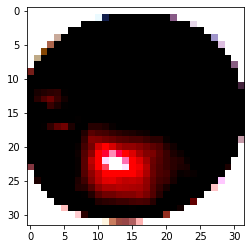

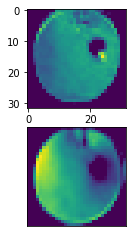

In [23]:
from torchvision.transforms import ToTensor
test_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])
test_dataset = ImageFolder(data_dir+'/TEST', test_tfms)
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach().cpu()
    return hook

model.conv1.register_forward_hook(get_activation('conv2'))
data, _ = test_dataset[2]
plt.imshow(data.permute(2,1,0))
data.unsqueeze_(0)
output = model(data.to(device='cuda'))
act = activation['conv2'].squeeze().cpu()
num_plot = 2
fig, axarr = plt.subplots(min(act.size(0), num_plot))
for idx in range(min(act.size(0), num_plot)):
  axarr[idx].imshow(act[idx])
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        # return loss calculator backward
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [25]:
history = [evaluate(model, valid_dl)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.011538461782038212, 'val_loss': 4.605404376983643}]

In [26]:
epochs = 10
max_lr = 0.01
grad_clip = 0.1
weight_decay =1e-4
opt_func = torch.optim.Adam

In [27]:
# model.freeze()

In [28]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00278, train_loss: 3.6971, val_loss: 4.0848, val_acc: 0.1583
Epoch [1], last_lr: 0.00759, train_loss: 3.0471, val_loss: 3.0645, val_acc: 0.2657
Epoch [2], last_lr: 0.01000, train_loss: 2.3388, val_loss: 2.6389, val_acc: 0.3414
Epoch [3], last_lr: 0.00950, train_loss: 2.0973, val_loss: 2.2102, val_acc: 0.4200
Epoch [4], last_lr: 0.00812, train_loss: 1.6341, val_loss: 1.8163, val_acc: 0.5092
Epoch [5], last_lr: 0.00611, train_loss: 1.4173, val_loss: 1.5528, val_acc: 0.5664
Epoch [6], last_lr: 0.00389, train_loss: 1.2053, val_loss: 1.5041, val_acc: 0.5798
Epoch [7], last_lr: 0.00188, train_loss: 0.9502, val_loss: 1.1785, val_acc: 0.6576
Epoch [8], last_lr: 0.00050, train_loss: 0.6894, val_loss: 1.0313, val_acc: 0.6998
Epoch [9], last_lr: 0.00000, train_loss: 0.5213, val_loss: 0.9963, val_acc: 0.7102
CPU times: user 6min 39s, sys: 19.1 s, total: 6min 58s
Wall time: 8min 12s


In [29]:
#model.unfreeze()

In [30]:
%%time
history += fit_one_cycle(epochs, 0.001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00028, train_loss: 0.4931, val_loss: 1.0036, val_acc: 0.7085
Epoch [1], last_lr: 0.00076, train_loss: 0.5061, val_loss: 1.1202, val_acc: 0.6831
Epoch [2], last_lr: 0.00100, train_loss: 0.5333, val_loss: 1.1768, val_acc: 0.6763
Epoch [3], last_lr: 0.00095, train_loss: 0.5011, val_loss: 1.2225, val_acc: 0.6716
Epoch [4], last_lr: 0.00081, train_loss: 0.4223, val_loss: 1.1539, val_acc: 0.6849
Epoch [5], last_lr: 0.00061, train_loss: 0.3282, val_loss: 1.0991, val_acc: 0.6990
Epoch [6], last_lr: 0.00039, train_loss: 0.2344, val_loss: 1.0611, val_acc: 0.7077
Epoch [7], last_lr: 0.00019, train_loss: 0.1674, val_loss: 1.0327, val_acc: 0.7225
Epoch [8], last_lr: 0.00005, train_loss: 0.1285, val_loss: 1.0211, val_acc: 0.7245
Epoch [9], last_lr: 0.00000, train_loss: 0.1107, val_loss: 1.0191, val_acc: 0.7262
CPU times: user 6min 41s, sys: 20.8 s, total: 7min 2s
Wall time: 8min 13s


In [31]:
%%time
history += fit_one_cycle(4, 0.00001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00001, train_loss: 0.1106, val_loss: 1.0179, val_acc: 0.7261
Epoch [1], last_lr: 0.00001, train_loss: 0.1096, val_loss: 1.0160, val_acc: 0.7266
Epoch [2], last_lr: 0.00000, train_loss: 0.1052, val_loss: 1.0182, val_acc: 0.7265
Epoch [3], last_lr: 0.00000, train_loss: 0.1063, val_loss: 1.0182, val_acc: 0.7264
CPU times: user 2min 43s, sys: 7.61 s, total: 2min 51s
Wall time: 3min 16s


In [32]:
%%time
history += fit_one_cycle(4, 0.0001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00009, train_loss: 0.1071, val_loss: 1.0332, val_acc: 0.7258
Epoch [1], last_lr: 0.00008, train_loss: 0.1050, val_loss: 1.0423, val_acc: 0.7223
Epoch [2], last_lr: 0.00003, train_loss: 0.0919, val_loss: 1.0351, val_acc: 0.7256
Epoch [3], last_lr: 0.00000, train_loss: 0.0863, val_loss: 1.0343, val_acc: 0.7268
CPU times: user 2min 42s, sys: 8.01 s, total: 2min 50s
Wall time: 3min 16s


In [33]:
%%time
history += fit_one_cycle(10, 0.0001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00003, train_loss: 0.0853, val_loss: 1.0362, val_acc: 0.7268
Epoch [1], last_lr: 0.00008, train_loss: 0.0846, val_loss: 1.0397, val_acc: 0.7248
Epoch [2], last_lr: 0.00010, train_loss: 0.0813, val_loss: 1.0598, val_acc: 0.7261
Epoch [3], last_lr: 0.00010, train_loss: 0.0780, val_loss: 1.0632, val_acc: 0.7255
Epoch [4], last_lr: 0.00008, train_loss: 0.0687, val_loss: 1.0756, val_acc: 0.7211
Epoch [5], last_lr: 0.00006, train_loss: 0.0643, val_loss: 1.0653, val_acc: 0.7233
Epoch [6], last_lr: 0.00004, train_loss: 0.0581, val_loss: 1.0704, val_acc: 0.7256
Epoch [7], last_lr: 0.00002, train_loss: 0.0523, val_loss: 1.0712, val_acc: 0.7244
Epoch [8], last_lr: 0.00000, train_loss: 0.0508, val_loss: 1.0741, val_acc: 0.7244
Epoch [9], last_lr: 0.00000, train_loss: 0.0485, val_loss: 1.0735, val_acc: 0.7257
CPU times: user 6min 47s, sys: 19.2 s, total: 7min 6s
Wall time: 8min 12s


In [34]:
train_time='30:00'

In [35]:
# Plotted the accuracy Graph
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

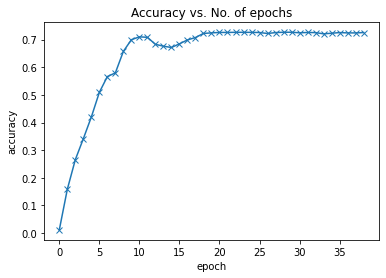

In [36]:
plot_accuracies(history)

In [37]:
# Training and Validation loss graph
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

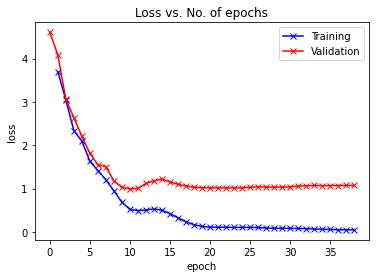

In [38]:
plot_losses(history)

In [39]:
# Learning Rate Graph
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

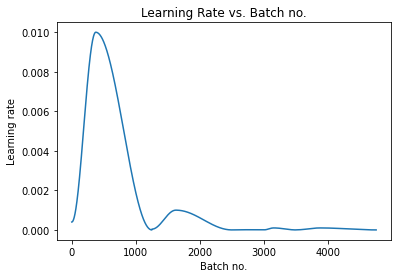

In [40]:
plot_lrs(history)

# **Prediction and testing of MODEL**

In [41]:
from torchvision.transforms import ToTensor
test_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])
test_dataset = ImageFolder(data_dir+'/TEST', test_tfms)

In [42]:
dataset = ImageFolder(data_dir+'/TRAIN', transform=ToTensor())

In [43]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: bed , Predicted: bed


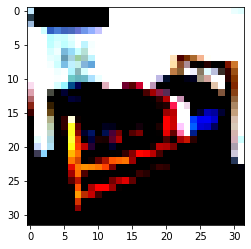

In [44]:

img, label = test_dataset[550]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: apple , Predicted: apple


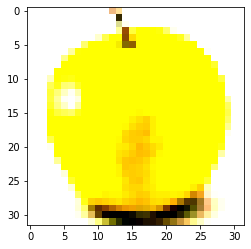

In [45]:
img, label = test_dataset[16]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: aquarium_fish , Predicted: aquarium_fish


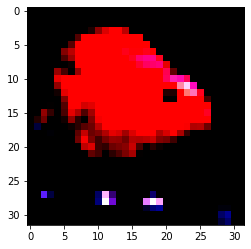

In [46]:

img, label = test_dataset[117]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: aquarium_fish , Predicted: aquarium_fish


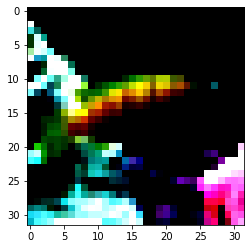

In [57]:

img, label = test_dataset[135]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [48]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.7256730198860168, 'val_loss': 1.0734803676605225}

##SHOW LINK WEBSITE


In [49]:
!pip install selenium

     |████████████████████████████████| 904 kB 6.8 MB/s 


In [50]:
def is_valid(url):
    """
    Checks whether `url` is a valid URL.
    """
    parsed = urlparse(url)
    return bool(parsed.netloc) and bool(parsed.scheme)
    
def get_all_images(url):
    """
    Returns all image URLs on a single `url`
    """
    soup = bs(requests.get(url).content, "html.parser")
    urls = []
    for img in tqdm(soup.find_all("img"), "Extracting images"):
        img_url = img.attrs.get("src")
        if not img_url:
            # if img does not contain src attribute, just skip
            continue
        # make the URL absolute by joining domain with the URL that is just extracted
        img_url = urljoin(url, img_url)
        try:
            pos = img_url.index("?")
            img_url = img_url[:pos]
        except ValueError:
            pass
        # finally, if the url is valid
        if is_valid(img_url):
            urls.append(img_url)
    return urls

In [58]:
from googlesearch import search
import webbrowser
import PIL
import requests
from bs4 import BeautifulSoup as bs
from urllib.parse import urljoin, urlparse
from tqdm import tqdm
import io
a = predict_image(img, model)
for url in search(a, stop=5):
     print(url)
     i=len(a)

https://en.wikipedia.org/wiki/Aquarium
https://aquariumfish.net/home
https://aquariumfish.net/catalog_pages/freshwater_fish_for_sale.htm
https://aquariumfish.net/catalog_pages/cichlids_neotropical/discus_fish_for_sale.htm
https://aquariumfish.net/catalog_pages/wild/baby_whale_for_sale.htm


In [ ]:
from torchvision.transforms import ToTensor
test_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])
test_dataset = ImageFolder(data_dir+'/TEST', test_tfms)
activation = {}
    #  images = get_all_images(url)
    #  a = plt.imread(url)
    #  plt.imshow(a)
    #  plt.show()
    #  print(images[url])

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach().cpu()
    return hook

model.conv2.register_forward_hook(get_activation('conv2'))
data, _ = test_dataset[2]
plt.imshow(data.permute(2,1,0))
data.unsqueeze_(0)
output = model(data.to(device='cuda'))
act = activation['conv2'].squeeze().cpu()
num_plot = 4
fig, axarr = plt.subplots(min(act.size(0), num_plot))
for idx in range(min(act.size(0), num_plot)):
  axarr[idx].imshow(act[idx])
plt.xticks([])
plt.yticks([])
plt.show()